<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/PyTorch_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

import numpy as np
import torch
from torchvision import datasets, transforms

##Classification

In [ ]:
MNIST = datasets.MNIST('.', train=False, transform=transforms.ToTensor(), download=True)
data, label = MNIST[0]
print(type(data), type(label))
# print(data.size(), label.size())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

<class 'torch.Tensor'> <class 'int'>


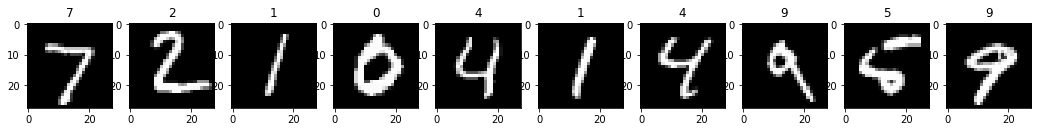

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(18,4))
for i in range(10):
    data, label = MNIST[i]
    ax[i].imshow(data[0], cmap='gray')
    ax[i].set_title(str(label))

##Detection and Segementation

In [ ]:
VOC = datasets.VOCDetection('.', image_set='train', download=transforms.ToTensor())

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to .


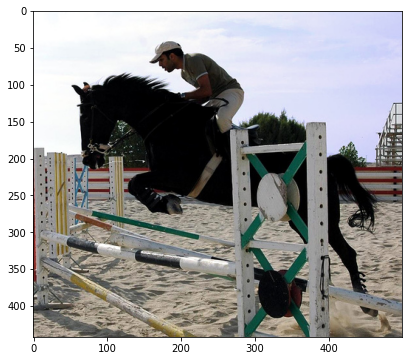

In [ ]:
data, label = VOC[0]
plt.figure(figsize=(8,6))
plt.imshow(data);

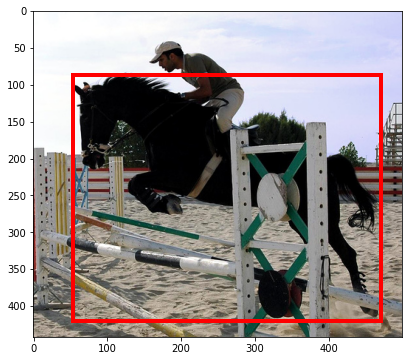

In [ ]:
bbox = label['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(data)

w, h = xmax - xmin, ymax - ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color='r', linewidth=4)
ax.add_patch(rect);

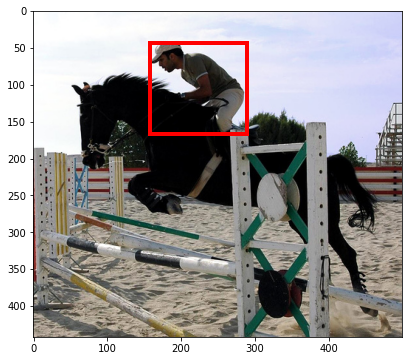

In [ ]:
bbox = label['annotation']['object'][1]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(data)

w, h = xmax - xmin, ymax - ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color='r', linewidth=4)
ax.add_patch(rect);

In [ ]:
VOCs = datasets.VOCSegmentation('.', year='2012', image_set='val', download=True,
                                transform=transforms.ToTensor(), target_transform=transforms.ToTensor())

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to .


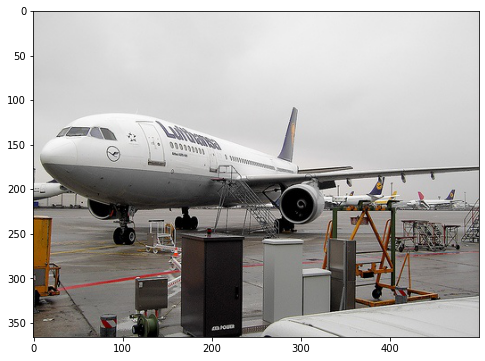

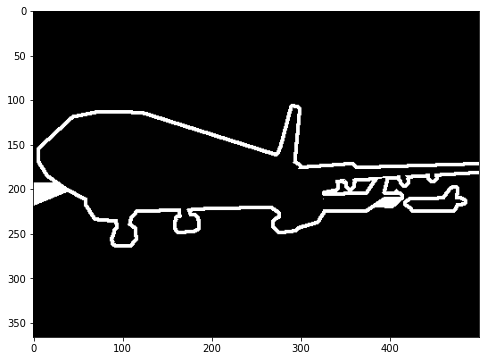

In [ ]:
data, label = VOCs[0]
data = data.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(data)
plt.figure(figsize=(8,6))
plt.imshow(label[0], cmap='gray');

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./


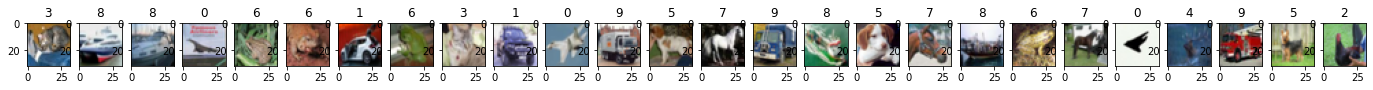

In [ ]:
# cifar 10
cifar10 = datasets.CIFAR10('./', train=False, download=True, transform=transforms.ToTensor())
data, label = cifar10[0]

f, ax = plt.subplots(1,26, figsize=(24,6))
for i in range(26):
    data, label = cifar10[i]
    ax[i].imshow(data.permute(1,2,0))
    ax[i].set_title(str(label))
plt.show()

##1D Convolution

In [ ]:
from scipy.signal import convolve

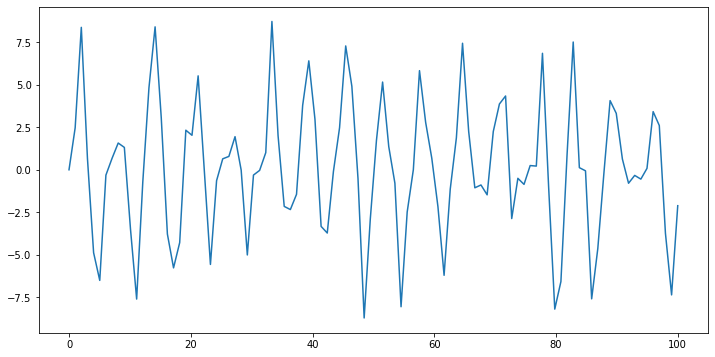

In [ ]:
x = np.linspace(0, 100, 100)
y = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(12,6))
plt.plot(x, y);

In [ ]:
def show(values, title):
    plt.figure(figsize=(len(values), 2))
    plt.imshow(values[np.newaxis, :], cmap='gray')
    for k, s in enumerate(values):
        plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
    plt.title(title, fontsize=18)
    plt.yticks([])

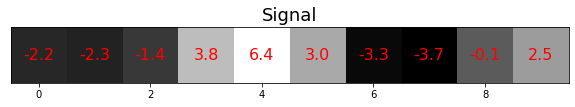

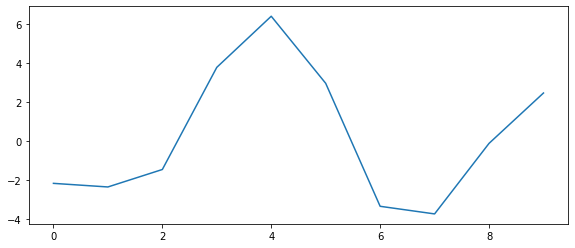

In [ ]:
signal = y[35:45]
show(signal, 'Signal')
plt.figure(figsize=(9.66,4))
plt.plot(signal);

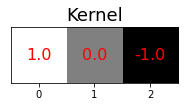

In [ ]:
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')

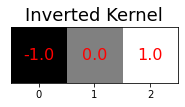

In [ ]:
invert_kernel = np.flip(kernel)
show(invert_kernel, 'Inverted Kernel')

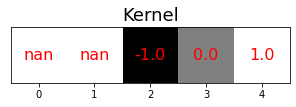

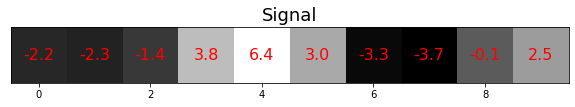

In [ ]:
u = 2
moging = [float('nan')] * u
moving_kernel = np.hstack((moging, invert_kernel))
show(moving_kernel, 'Kernel')
show(signal, 'Signal')

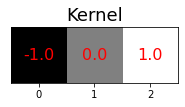

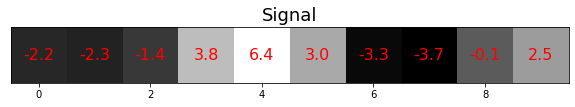

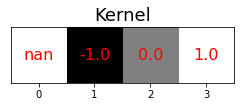

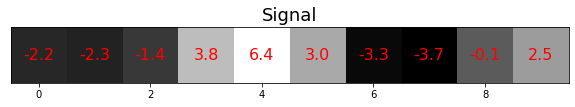

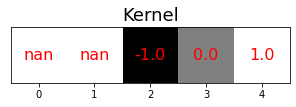

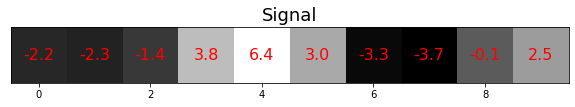

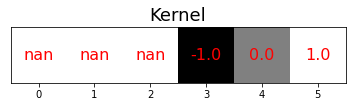

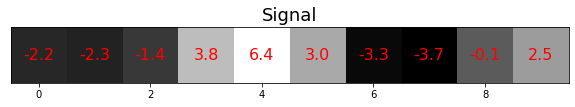

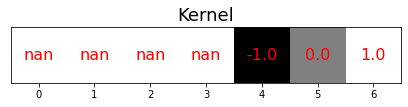

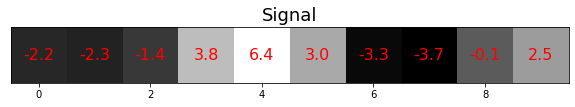

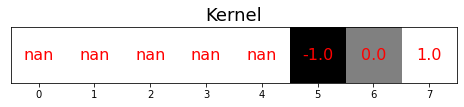

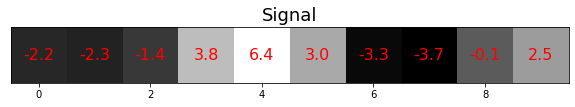

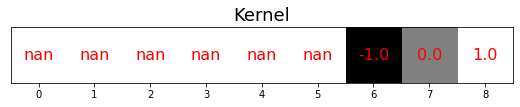

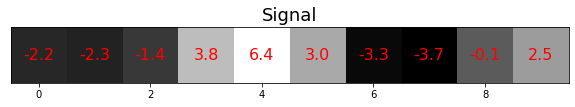

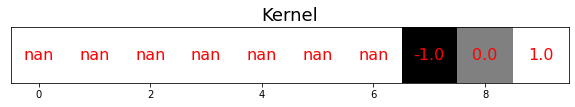

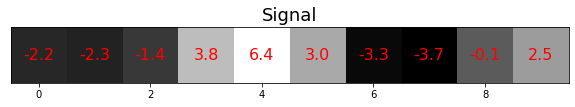

In [ ]:
for i in range(8):    
    u = i
    moging = [float('nan')] * u
    moving_kernel = np.hstack((moging, invert_kernel))
    show(moving_kernel, 'Kernel')
    show(signal, 'Signal')

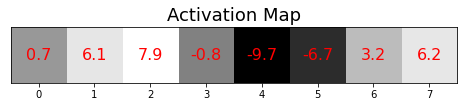

In [ ]:
# using convolve function
activation = convolve(signal, kernel, mode='valid')
show(activation, 'Activation Map')

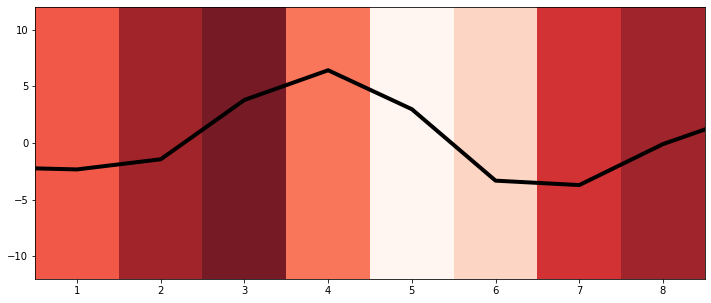

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(signal, color='k', linewidth=4)
plt.imshow(activation[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.9, extent=(0.5, 8.5, -12, 12));

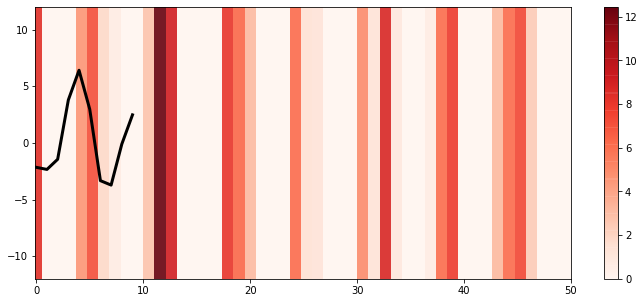

In [ ]:
activation = convolve(y[:50], kernel, mode='valid')
activation[activation < 0] = 0
plt.figure(figsize=(12,5))
plt.plot(signal, color='k', linewidth=3)
plt.imshow(activation[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.9, extent=(-0.5, 50, -12, 12))
plt.xlim(-.1, 50)
plt.colorbar();

In [ ]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

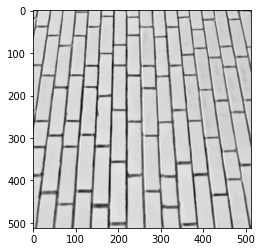

In [ ]:
img = data.brick()
plt.imshow(img, cmap='Greys')

In [ ]:
def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

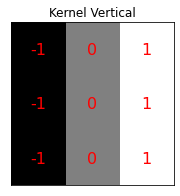

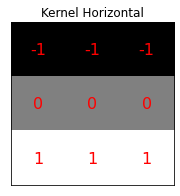

In [ ]:
kernel_v = [ [-1, 0, 1],
             [-1, 0, 1],
             [-1, 0, 1]]

show(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1, -1],
             [0, 0, 0],
             [1, 1, 1]]
show(kernel_h, 'Kernel Horizontal')

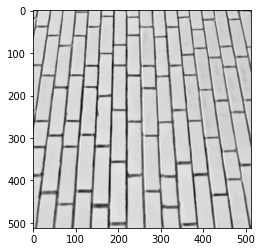

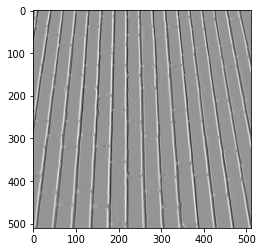

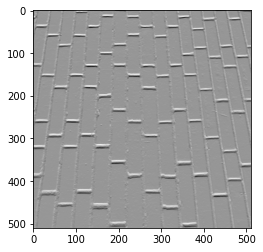

In [ ]:
char_map = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(char_map, cmap='Greys')

char_map = convolve(img, kernel_h, mode='valid')
plt.figure()
plt.imshow(char_map, cmap='Greys');

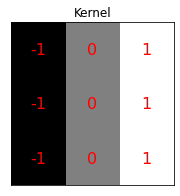

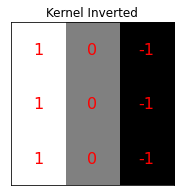

In [ ]:
show(kernel_v, 'Kernel')
show(np.flip(kernel_v), 'Kernel Inverted')

In [ ]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

--2022-09-09 18:19:25--  https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png
Resolving is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)... 23.211.180.23, 2600:1408:5400:496::2a1, 2600:1408:5400:48d::2a1, ...
Connecting to is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)|23.211.180.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30504 (30K) [image/png]
Saving to: ‘1200x630wa.png’

1200x630wa.png      100%[===================>]  29.79K  --.-KB/s    in 0.01s   

2022-09-09 18:19:25 (2.75 MB/s) - ‘1200x630wa.png’ saved [30504/30504]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


Text(0.5, 1.0, 'Mapa de ativação')

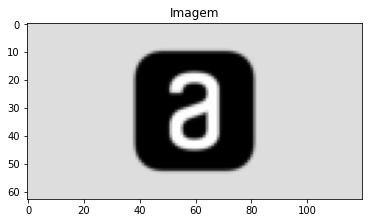

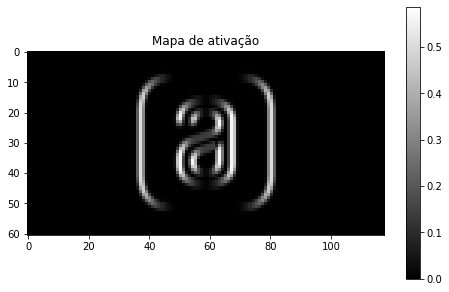

In [ ]:
img = io.imread('1200x630wa.png')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

saida = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida), cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação')

Text(0.5, 1.0, 'Mapa de ativação')

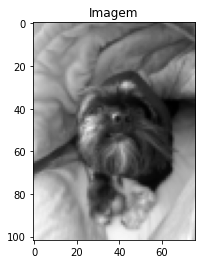

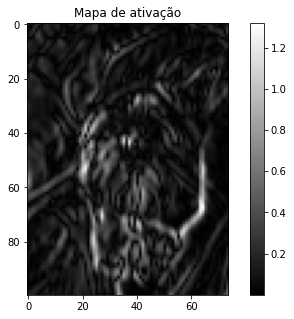

In [ ]:
img = io.imread('/content/drive/MyDrive/Fotos/WhatsApp Image 2022-08-11 at 17.51.55.jpeg')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

saida = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida), cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação')

In [ ]:
def activation_map(x):
    img = io.imread(x)
    img = color.rgb2gray(img)
    img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

    saida = convolve(img, kernel_v, 'valid')

    plt.imshow(img, cmap='gray')
    plt.title('Imagem')

    plt.figure(figsize=(8, 5))
    plt.imshow(np.abs(saida), cmap='gray')
    plt.colorbar()
    plt.title('Mapa de ativação')

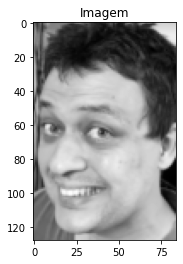

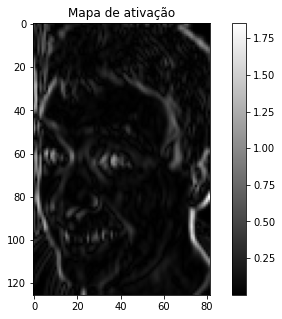

In [ ]:
activation_map('/content/drive/MyDrive/Fotos/ronald.jpeg')

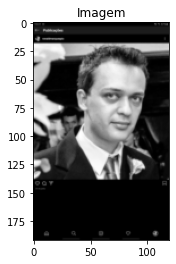

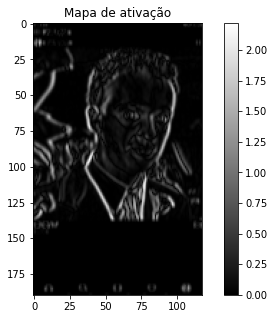

In [ ]:
activation_map('/content/drive/MyDrive/Fotos/Screenshot_20200903-102129_Instagram.jpg')

## CNN (Convolution Neural Network)

In [ ]:
import torch
from torch import nn
from skimage import data

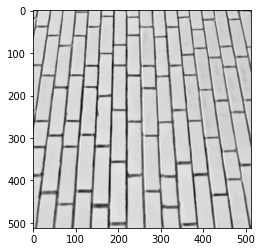

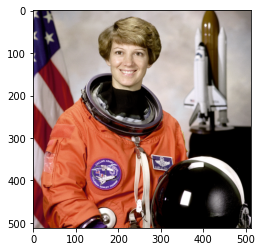

In [ ]:
pb = data.brick()
rgb = data.astronaut()

plt.imshow(pb, cmap='Greys')
plt.figure()
plt.imshow(rgb);

In [ ]:
# convolutional layer
conv = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
conv

Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
pb_tns = torch.Tensor(pb)
pb_tns = pb_tns.view(1,1, pb_tns.size(0), pb_tns.size(1))
pb_tns

tensor([[[[ 99.,  98.,  99.,  ..., 166., 160., 150.],
          [ 99., 100.,  99.,  ..., 174., 167., 152.],
          [ 98.,  98.,  98.,  ..., 171., 170., 156.],
          ...,
          [ 99.,  98., 100.,  ..., 179., 186., 185.],
          [ 98.,  98., 101.,  ..., 182., 185., 182.],
          [ 98.,  99., 102.,  ..., 179., 183., 176.]]]])

In [ ]:
activation_map = conv(pb_tns)
activation_map.size()

torch.Size([1, 16, 510, 510])

In [ ]:
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2,0,1).unsqueeze(0) # channel/height/width
activation_map = conv(rgb_tns)
print(conv)
print(rgb_tns.size())
activation_map.size()

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([1, 3, 512, 512])


torch.Size([1, 16, 512, 512])

##Pooling

In [ ]:
tns = torch.FloatTensor([[[1,2,3], [4,5,6], [7,8,9]]])
pool = nn.MaxPool2d(kernel_size=2, stride=1)
output = pool(tns)
tns.size(), output.size(), tns

(torch.Size([1, 3, 3]), torch.Size([1, 2, 2]), tensor([[[1., 2., 3.],
          [4., 5., 6.],
          [7., 8., 9.]]]))

In [ ]:
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
rgb = data.astronaut()
rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2, 0, 1).unsqueeze(0)
act_map = conv(rgb_tns)
print('Feature Map:', act_map.shape)

Feature Map: torch.Size([1, 16, 512, 512])


In [ ]:
pool = nn.MaxPool2d(kernel_size=2, stride=2)
output = pool(act_map)
output.size()

torch.Size([1, 16, 256, 256])

## Batch Normalization

Doc: https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm2d

In [ ]:
block_conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=5)
)
print(block_conv)

minibatch = torch.cat(12*[rgb_tns])

print(minibatch.size())
saida = block_conv(minibatch)
print(saida.size())

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([12, 3, 512, 512])
torch.Size([12, 32, 102, 102])
